<a href="https://colab.research.google.com/github/kartikparlikar/Diwali_sales_analysis/blob/main/Diwali_sales_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATASET OVERVIEW**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_csv('/content/drive/MyDrive/Diwali Sales Data.csv',encoding= 'unicode_escape')

In [43]:
df.shape

(11251, 15)

In [44]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# **DATA CLEANING**

In [46]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [47]:
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0,NaN,NaN
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0,NaN,NaN
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0,NaN,NaN
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0,NaN,NaN
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0,NaN,NaN
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0,NaN,NaN
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0,NaN,NaN
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0,NaN,NaN


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [50]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.124300e+04,11243.000000,11243.000000,11243.000000,11231.000000
mean,1.003005e+06,35.422841,0.420261,2.488749,9454.084982
std,1.716141e+03,12.756369,0.493623,1.114960,5221.728776
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001494e+06,27.000000,0.000000,1.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [51]:
df['Age'].value_counts()

30    522
26    494
28    458
29    454
31    447
     ... 
81      8
70      7
92      7
59      7
62      5
Name: Age, Length: 81, dtype: int64

In [52]:
df['Orders'].value_counts()

2    2895
1    2812
4    2771
3    2765
Name: Orders, dtype: int64

In [53]:
df['Amount'].value_counts()

7907.0     11
7956.0     10
7086.0      9
6923.0      8
7898.0      8
           ..
12079.0     1
12082.0     1
12083.0     1
12085.0     1
188.0       1
Name: Amount, Length: 6584, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb25d1df790>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb25d1dfcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb25d1df4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb25d228250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb25d2284f0>],
 'means': []}

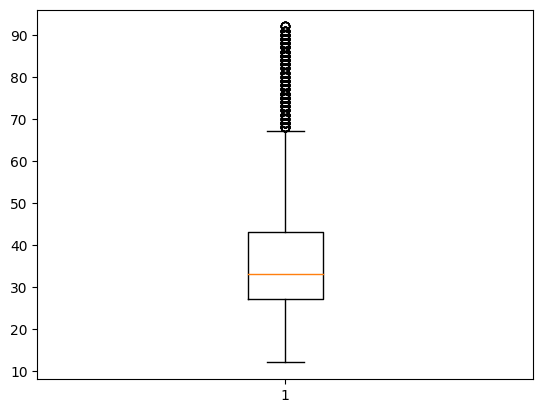

In [54]:
plt.boxplot(df['Age'])

In [55]:
df.drop(df[df['Age'] > 65].index, inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb25d073970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb25d073f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb25d0736d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb25d0a0490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb25d0a0730>],
 'means': []}

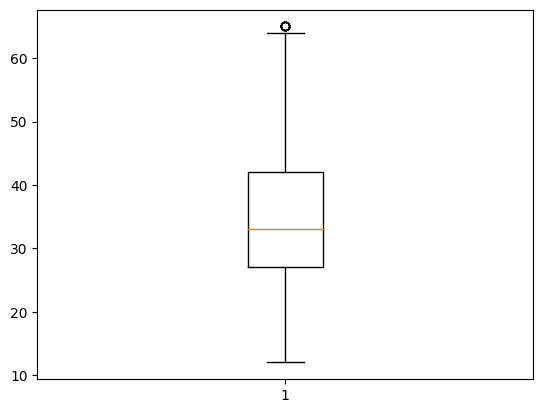

In [56]:
plt.boxplot(df['Age'])

In [57]:
df.shape

(10936, 13)

# ***EDA***

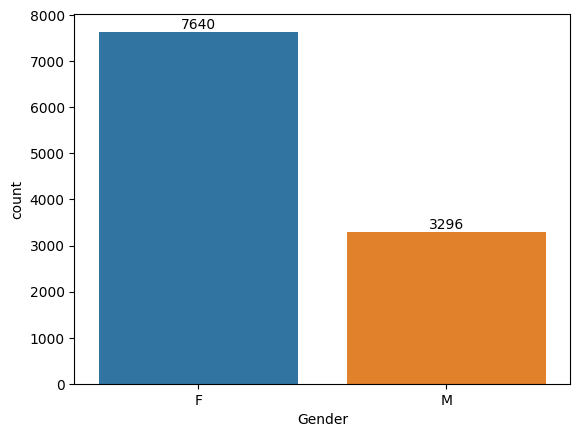

In [58]:
k = sns.countplot(x = 'Gender',data = df)
for bars in k.containers:
    k.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='count'>

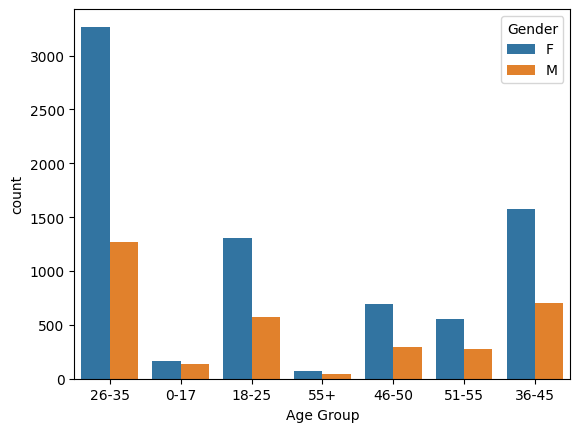

In [59]:
sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

<Axes: xlabel='Age Group', ylabel='Amount'>

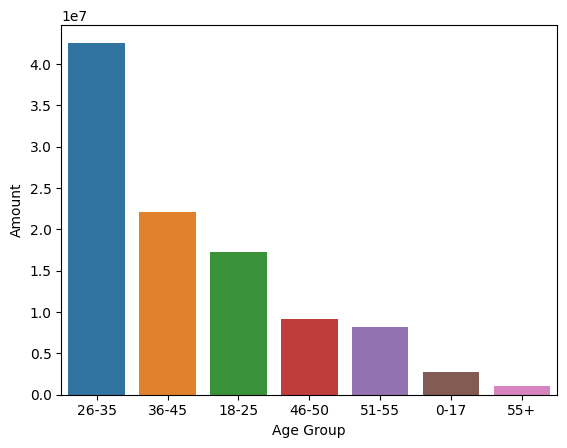

In [60]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)



```
From above graphs we can see that.Most of the orders are from female customers.
The age group of more than 26 to 35 years brings the maximum number of customers
or the maximum number of female customers in comparison to male customers.
```



In [61]:
df['Marital_Status'].value_counts()

0    6330
1    4606
Name: Marital_Status, dtype: int64

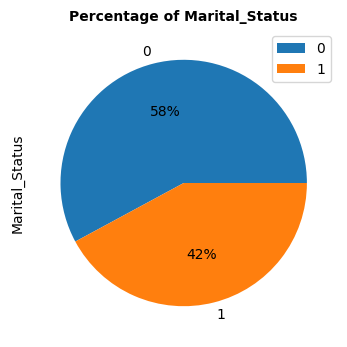

In [62]:
plt.figure(figsize = (4,4))
df['Marital_Status'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Percentage of Marital_Status',fontweight="bold", size=10)
plt.legend()
plt.show()



```
From the above graph we can say that most of the buyers are married and they spent more amount on purchasing goods in diwali.
```



In [63]:
state_orders = df.groupby(['State'])['Orders'].sum().reset_index().sort_values(by= 'Orders',ascending=False)
state_orders

,State,Orders
14,Uttar Pradesh,4658
10,Maharashtra,3695
7,Karnataka,3180
2,Delhi,2688
9,Madhya Pradesh,2189
0,Andhra Pradesh,2001
5,Himachal Pradesh,1528
8,Kerala,1085
4,Haryana,1079
3,Gujarat,1037


Text(0.5, 1.0, 'States by Orders ')

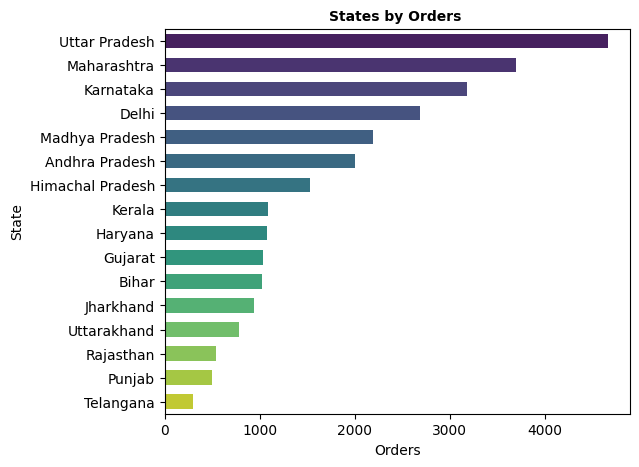

In [64]:
plt.figure(figsize = (6,5))
sns.barplot(data = state_orders, y = 'State',x= 'Orders', width=0.6,palette='viridis')
plt.title('States by Orders ',fontweight="bold", size=10)

In [65]:
state_sales = df.groupby(['State'])['Amount'].sum().reset_index().sort_values(by= 'Amount',ascending=False)
state_sales

,State,Amount
14,Uttar Pradesh,18706733.00
10,Maharashtra,13964755.00
7,Karnataka,13209801.00
2,Delhi,11403340.45
9,Madhya Pradesh,7848065.00
0,Andhra Pradesh,7831947.99
5,Himachal Pradesh,4830015.00
4,Haryana,4103363.00
1,Bihar,3914119.00
3,Gujarat,3783853.00


Text(0.5, 1.0, 'States by sales ')

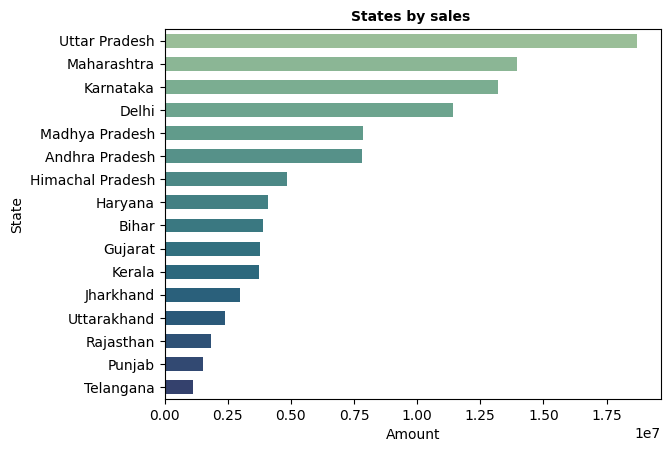

In [66]:
sns.barplot(data = state_sales, y = 'State',x= 'Amount', width=0.6,palette='crest')
plt.title('States by sales ',fontweight="bold", size=10)



```
From Above Graphs Most Orders Come's From  UttarPradesh, Maharashtra, Karnataka, Delhi, MadhyaPradesh
These Are Top 5 States By Order's And Sales
```



In [67]:
zones = df.groupby(['Zone'],as_index = False)['Orders'].sum().sort_values(by= 'Orders', ascending = False)
zones

,Zone,Orders
0,Central,10312
3,Southern,6565
4,Western,4732
2,Northern,3641
1,Eastern,1961


Text(0.5, 1.0, 'Zones by Orders')

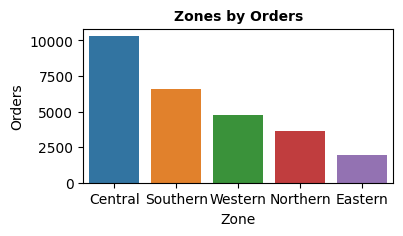

In [68]:
plt.figure(figsize = (4,2))
sns.barplot(data = zones, x= 'Zone',y= 'Orders')
plt.title('Zones by Orders',fontweight="bold", size=10)




```
▶ Central Zone has given us the maximum number of orders.
```



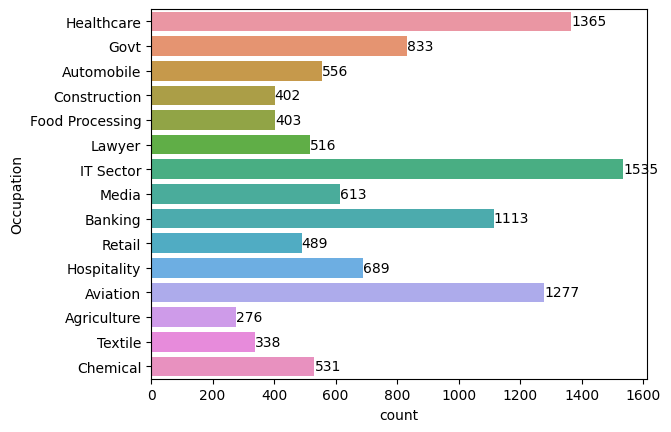

In [69]:
k = sns.countplot(y = 'Occupation',data = df)
for bars in k.containers:
    k.bar_label(bars)

In [70]:
OA = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)

Text(0.5, 1.0, 'Occupation by sales')

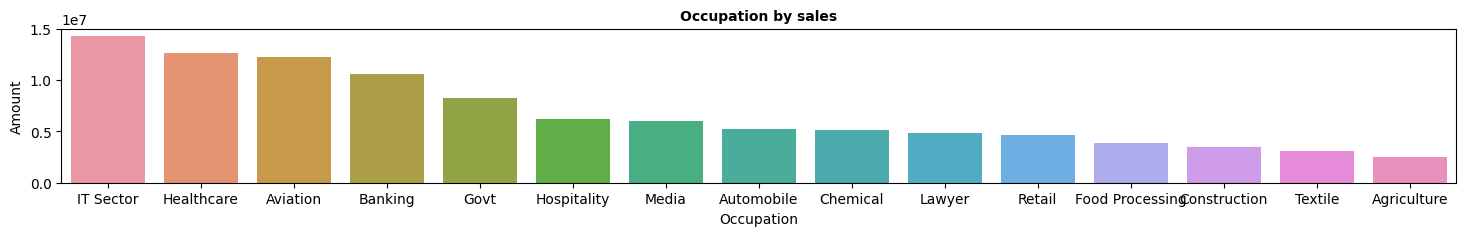

In [71]:
plt.figure(figsize = (18,2))
sns.barplot(data = OA, x= 'Occupation',y= 'Amount')
plt.title('Occupation by sales',fontweight="bold", size=10)

In [72]:
df.groupby(['Occupation'],as_index = False)['Orders'].sum().sort_values(by= 'Orders', ascending = False).T

,10,8,2,3,7,9,12,1,11,4,13,6,5,14,0
Occupation,IT Sector,Healthcare,Aviation,Banking,Govt,Hospitality,Media,Automobile,Lawyer,Chemical,Retail,Food Processing,Construction,Textile,Agriculture
Orders,3869,3347,3143,2757,2101,1693,1537,1351,1304,1282,1250,1016,988,866,707


```

From the above graph, the maximum order comes from IT sector, then healthcare, aviation, banking, government.
Most orders and sales come from people with these 5 occupations


```



In [73]:
df['Product_Category'].value_counts()

Clothing & Apparel       2581
Food                     2427
Electronics & Gadgets    2026
Footwear & Shoes         1027
Household items           515
Beauty                    406
Games & Toys              373
Sports Products           348
Furniture                 343
Pet Care                  209
Stationery                110
Office                    107
Books                     101
Auto                       95
Decor                      92
Veterinary                 80
Tupperware                 71
Hand & Power Tools         25
Name: Product_Category, dtype: int64

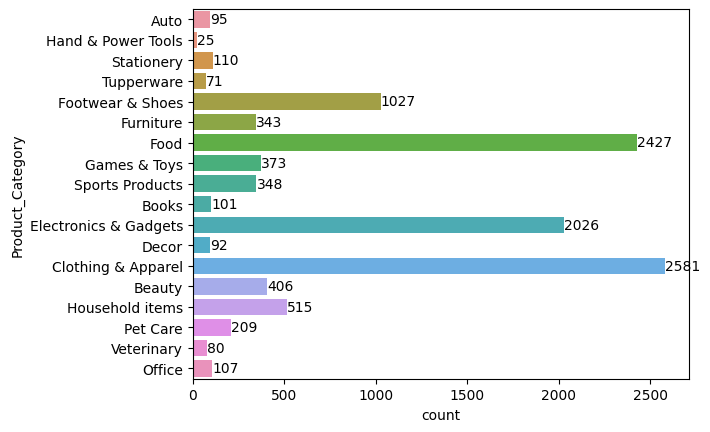

In [74]:
k = sns.countplot(y = 'Product_Category',data = df)
for bars in k.containers:
    k.bar_label(bars)

Text(0.5, 1.0, 'Top 5 Product_Category by sales')

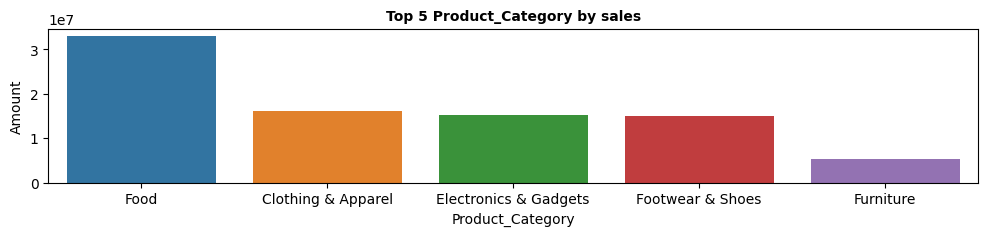

In [75]:
prod_sales = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
plt.figure(figsize = (12,2))
sns.barplot(data = prod_sales, x= 'Product_Category',y= 'Amount')
plt.title('Top 5 Product_Category by sales',fontweight="bold", size=10)



```
When compared by sales, it is observed that people are most interested in the food category.
```



<Axes: xlabel='Product_ID'>

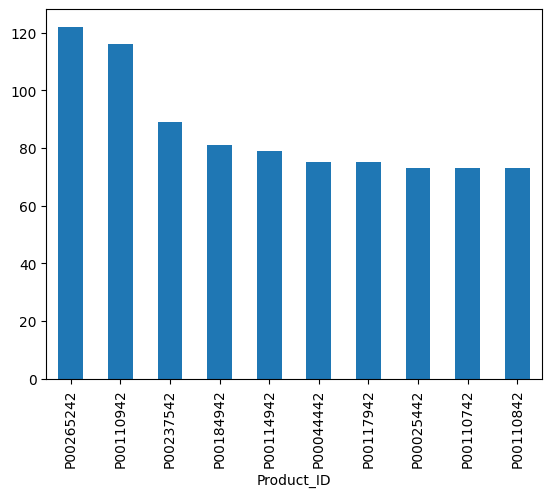

In [76]:
df.groupby('Product_ID')['Orders'].sum().nlargest(10).plot(kind='bar')

# ***Conclusion:***




```
From above graphs we can see that.Most of the orders are from female customers.
The age group of more than 26 to 35 years brings the maximum number of customers
the maximum number of female customers in comparison to male customers.Most Orders Come's From
UttarPradesh, Maharashtra, Karnataka, Delhi, MadhyaPradesh and
Central Zone has given us the maximum number of orders.

These Are Top 5 States By Order's And Sales the maximum order comes from IT sector,
then healthcare, aviation, banking, government.
Most orders and sales come from people with these 5 occupations When compared by sales,
it is observed that people are most interested in the food category. 
```



*Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

In [77]:
df.to_csv("Diwali.csv") 